# Data Analysis and Machine Learning Model for the data

#### Our aim is to diagnose patients with breast cancer by analyzing the data of patients and categorizing them into two categories:
1. Benign (B)
2. Malignant (M)

#### Libraries Used:

1. pandas 
An open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.
2. numpy
Fundamental package for scientific computations in Python
3. matplotlib
Matplotlib is a plotting library for the Python programming language
4. sklearn
A machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines,KNeighborsClassifier,LinearSVC

In [104]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.externals import joblib

### Data

###### The data was collected from 
https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

columns:

{id,	diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se,compactness_se,concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst,	perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst }


id
ID number

diagnosis
The diagnosis of breast tissues (M = malignant, B = benign)

radius_mean
mean of distances from center to points on the perimeter

texture_mean
standard deviation of gray-scale values

perimeter_mean
mean size of the core tumor

area_mean
mean area of the core tumor

smoothness_mean
mean of local variation in radius lengths

compactness_mean
mean of perimeter^2 / area - 1.0

concavity_mean
mean of severity of concave portions of the contour

concave points_mean
mean for number of concave portions of the contour

symmetry_mean
mean symmetry

fractal_dimension_mean
mean for "coastline approximation" - 1

radius_se
standard error for the mean of distances from center to points on the perimeter

texture_se
standard error for standard deviation of gray-scale values

perimeter_se

area_se

smoothness_se
standard error for local variation in radius lengths

compactness_se
standard error for perimeter^2 / area - 1.0

concavity_se
standard error for severity of concave portions of the contour

concave points_se
standard error for number of concave portions of the contour

symmetry_se

fractal_dimension_se
standard error for "coastline approximation" - 1

radius_worst
"worst" or largest mean value for mean of distances from center to points on the perimeter

texture_worst
"worst" or largest mean value for standard deviation of gray-scale values

perimeter_worst

area_worst

smoothness_worst
"worst" or largest mean value for local variation in radius lengths

compactness_worst
"worst" or largest mean value for perimeter^2 / area - 1.0

concavity_worst
"worst" or largest mean value for severity of concave portions of the contour

concave points_worst
"worst" or largest mean value for number of concave portions of the contour

symmetry_worst

fractal_dimension_worst
"worst" or largest mean value for "coastline approximation" - 1

In [ ]:
#Loading the data and setting the values for X(non-class attributes) and y(target variable)
dataset=pd.read_csv('/home/manaswi/Desktop/data.csv')
print("Cancer data set dimensions : {}".format(dataset.shape))
X = dataset.iloc[:, 2:32].values
y = dataset.iloc[:, 1].values


In [ ]:
#To view a random sample for the dataset
dataset.sample(5)

## Data Visualization

Frequency distribution of data in target variable 'diagnosis'

Text(0.5, 0, 'Type of Cancer')

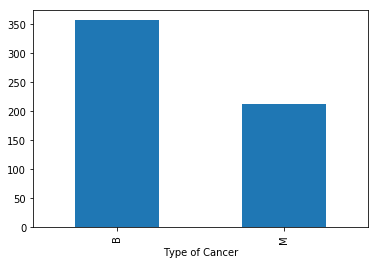

In [94]:
dataset.diagnosis.value_counts().plot(kind='bar')
plt.xlabel('Type of Cancer')

Data distribution based on frequency of unique values in the features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb5a1162470>,
      dtype=object)

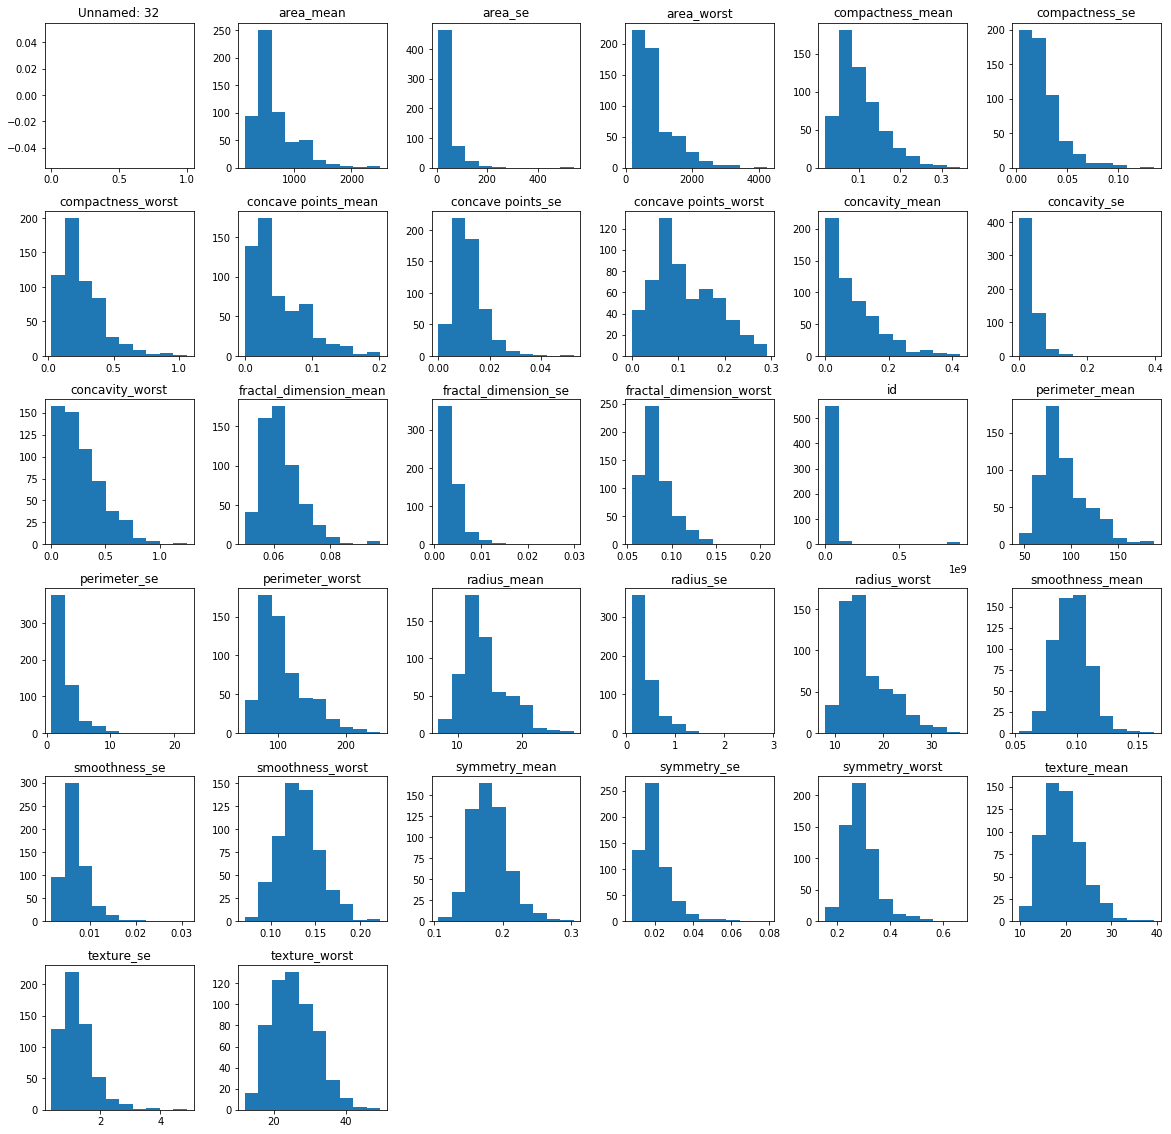

In [97]:
dataset.hist(bins=10,figsize=(20,20),grid=False)

In [ ]:
ax = sns.heatmap(X,annot=True,linewidths=.5,fmt='.1f',ax=ax)

### Checking the presence of missing values

In [ ]:
dataset.isnull().any()

### Checking the presence of duplicate values

In [ ]:
dataset.duplicated()

### LogisticRegression Model

In [98]:
logreg=LogisticRegression()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
logreg.score(X_test,y_test)


/home/manaswi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9649122807017544

The accuracy of the Logistic Regression Model is 0.96491.

### SVM Model

SVM is a supervised machine learning algorithm which can be used for classification or regression problems.


In [110]:
svm=LinearSVC()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
svm.score(X_test,y_test)


/home/manaswi/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9649122807017544

### Testing the model

In [105]:
filename= 'svmCancer.sav'
joblib.dump(svm, filename)

['svmCancer.sav']